In [2]:
from pycaret.classification import *


In [3]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [4]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [5]:
target = dataset[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


In [6]:

print(dataset.shape)

(976, 70)


In [7]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,APACHEII,active problems,background problems,feeding,Target_pro_day,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5,pro_to_target_day6,pro_to_target_day7,pro_to_target_day8,pro_to_target_day9,pro_to_target_day10,pro_to_target_day11,pro_to_target_day12,pro_to_target_day13,Total_EN_pro,Total_PN_pro,EN_pro_day0,PN_pro_day0,EN_pro_day1,PN_pro_day1,EN_pro_day2,PN_pro_day2,EN_pro_day3,PN_pro_day3,EN_pro_day4,PN_pro_day4,EN_pro_day5,PN_pro_day5,EN_pro_day6,PN_pro_day6,EN_pro_day7,PN_pro_day7,EN_pro_day8,PN_pro_day8,EN_pro_day9,PN_pro_day9,EN_pro_day10,PN_pro_day10,EN_pro_day11,PN_pro_day11,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,1,72,F,65.0,23.875115,16,MS,M,EN,84.5,0.961767,0.939582,1.214201,0.765396,1.072544,1.079290,1.079290,1.079290,0.930888,0.000000,0.0,0.000000,0.000000,0.0,770.830004,0.000000,81.269334,0.000000,79.394668,0.000000,102.600000,0.000000,64.676002,0.000000,90.630000,0.0,91.200000,0.0,91.20,0.0,91.200000,0.0,78.660000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,1,58,M,101.0,32.979592,23,M,MS,EN,131.3,0.583458,0.000000,0.516148,0.905991,0.310176,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,304.060957,0.000000,76.608002,0.000000,0.000000,0.000000,67.770277,0.000000,118.956574,0.000000,40.726105,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,1,44,M,70.0,22.857143,0,MSTA,MS,EN+SPN,91.0,0.524735,1.140478,1.162168,1.164145,0.197275,0.000000,0.599011,0.062183,0.213392,0.210169,0.0,0.520628,0.585421,0.0,216.038656,364.505424,0.000000,47.750864,0.000000,103.783475,1.628126,104.129203,97.745868,8.191366,17.951996,0.0,0.000000,0.0,54.51,0.0,5.658667,0.0,19.418667,0.0,19.125333,0.0,0.0,0.0,0.0,47.377161,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,0,71,F,48.0,19.227688,0,MS,M,EN,62.4,0.880983,1.169231,1.169231,1.169231,1.169231,0.930513,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,404.877337,0.000000,54.973335,0.000000,72.960001,0.000000,72.960001,0.000000,72.960000,0.000000,72.960000,0.0,58.064001,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,0,60,F,85.0,32.791945,17,M,MTA,EN,110.5,0.011463,0.660271,0.563065,0.709792,0.990407,0.990407,0.990407,0.067403,0.000000,0.000000,0.0,0.000000,0.000000,0.0,550.645335,0.000000,1.266667,0.000000,72.960000,0.000000,62.218668,0.000000,78.432001,0.000000,109.440000,0.0,109.440000,0.0,109.44,0.0,7.448000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [8]:
dataset=dataset.drop(['ICU_mortality'], axis=1)

In [9]:
dataset=dataset.drop(['28_mortality'], axis=1)
dataset=dataset.drop(['HOSP_mortality'], axis=1)
dataset=dataset.drop(['90 days mortality'], axis=1)

In [10]:
dataset=dataset.drop(['ICU_LOS'], axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['active problems'] = le.fit_transform(dataset['active problems'].astype(str))
dataset['background problems'] = le.fit_transform(dataset['background problems'].astype(str))
dataset['gender'] = le.fit_transform(dataset['gender'].astype(str))
dataset['feeding'] = le.fit_transform(dataset['feeding'].astype(str))
dataset['LOS_Group'] = le.fit_transform(dataset['feeding'].astype(str))

dataset.head()

,ser_num,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,APACHEII,active problems,background problems,feeding,Target_pro_day,pro_to_target_day0,pro_to_target_day1,pro_to_target_day2,pro_to_target_day3,pro_to_target_day4,pro_to_target_day5,pro_to_target_day6,pro_to_target_day7,pro_to_target_day8,pro_to_target_day9,pro_to_target_day10,pro_to_target_day11,pro_to_target_day12,pro_to_target_day13,Total_EN_pro,Total_PN_pro,EN_pro_day0,PN_pro_day0,EN_pro_day1,PN_pro_day1,EN_pro_day2,PN_pro_day2,EN_pro_day3,PN_pro_day3,EN_pro_day4,PN_pro_day4,EN_pro_day5,PN_pro_day5,EN_pro_day6,PN_pro_day6,EN_pro_day7,PN_pro_day7,EN_pro_day8,PN_pro_day8,EN_pro_day9,PN_pro_day9,EN_pro_day10,PN_pro_day10,EN_pro_day11,PN_pro_day11,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,0,0,1,0,1,72,0,65.0,23.875115,16,1,1,0,84.5,0.961767,0.939582,1.214201,0.765396,1.072544,1.079290,1.079290,1.079290,0.930888,0.000000,0.0,0.000000,0.000000,0.0,770.830004,0.000000,81.269334,0.000000,79.394668,0.000000,102.600000,0.000000,64.676002,0.000000,90.630000,0.0,91.200000,0.0,91.20,0.0,91.200000,0.0,78.660000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,0,0,1,0,1,58,1,101.0,32.979592,23,0,3,0,131.3,0.583458,0.000000,0.516148,0.905991,0.310176,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,304.060957,0.000000,76.608002,0.000000,0.000000,0.000000,67.770277,0.000000,118.956574,0.000000,40.726105,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,1,0,0,1,1,44,1,70.0,22.857143,0,3,3,1,91.0,0.524735,1.140478,1.162168,1.164145,0.197275,0.000000,0.599011,0.062183,0.213392,0.210169,0.0,0.520628,0.585421,0.0,216.038656,364.505424,0.000000,47.750864,0.000000,103.783475,1.628126,104.129203,97.745868,8.191366,17.951996,0.0,0.000000,0.0,54.51,0.0,5.658667,0.0,19.418667,0.0,19.125333,0.0,0.0,0.0,0.0,47.377161,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,0,0,1,1,0,71,0,48.0,19.227688,0,1,1,0,62.4,0.880983,1.169231,1.169231,1.169231,1.169231,0.930513,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,404.877337,0.000000,54.973335,0.000000,72.960001,0.000000,72.960001,0.000000,72.960000,0.000000,72.960000,0.0,58.064001,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,0,1,1,1,0,60,0,85.0,32.791945,17,0,8,0,110.5,0.011463,0.660271,0.563065,0.709792,0.990407,0.990407,0.990407,0.067403,0.000000,0.000000,0.0,0.000000,0.000000,0.0,550.645335,0.000000,1.266667,0.000000,72.960000,0.000000,62.218668,0.000000,78.432001,0.000000,109.440000,0.0,109.440000,0.0,109.44,0.0,7.448000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


Feature: 0, Score: 0.05579
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01386
Feature: 3, Score: 0.00317
Feature: 4, Score: 0.00507
Feature: 5, Score: 0.00673
Feature: 6, Score: 0.07210
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02012
Feature: 9, Score: 0.04276
Feature: 10, Score: 0.02768
Feature: 11, Score: 0.00747
Feature: 12, Score: 0.01460
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00522
Feature: 15, Score: 0.03184
Feature: 16, Score: 0.02373
Feature: 17, Score: 0.02479
Feature: 18, Score: 0.02416
Feature: 19, Score: 0.03126
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.01844
Feature: 23, Score: 0.01369
Feature: 24, Score: 0.00801
Feature: 25, Score: 0.01149
Feature: 26, Score: 0.00423
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.07452
Feature: 30, Score: 0.01237
Feature: 31, Score: 0.02926
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.03035
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.01010
Fe

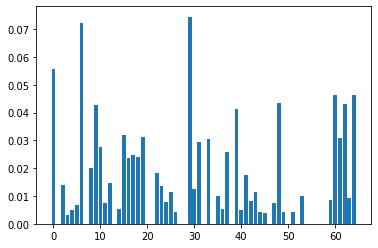

In [12]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(dataset.iloc[:,:], target.iloc[:,0:1])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [22]:
dataset.iloc[:,0:1]

,ser_num
0,2
1,3
2,5
3,7
4,9
...,...
1015,2515
1016,2521
1017,2523
1018,2525
